<a href="https://colab.research.google.com/github/vladimir-tatarin93" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#from google.colab import drive
#drive.mount ('/content/drive')
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import networkx as nx
import matplotlib.pyplot as plt

G1 =nx.read_edgelist("/gdrive/My Drive/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [0]:
print(nx.info(G1))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910



*  Node adalah faktor penting dalam menentukan interaksi user. semakin tinggi node, maka semakin banyak aktor yang terlibat dalam jaringan sosial tersebut. dalam data facebook kali ini terdapat node sebanyak 4039 nodes. 
*  Edge menunjukkan interaksi yang terjadi antar aktor. Semakin tinggi nilai edge akan menujukkan bahwa banyak percakapan atau hubungan yang terjadi dalam suatu jejaring sosial. dalam data kali ini terdapat 88234 edges.
*  Average degree menunjukkan jumlah rata-rata hubungan yang dimiliki aktor dalam jaringan sosial. Semakin tinggi nilai average degree semakin baik dikarenakan setiap aktor dalam jaringan tersebut memiliki banyak hubungan sehingga akan memperluas penyebaran informasi. dalam data facebook disini memiliki nilai 43.6910.


# **Between Centrality**

Betweenness centrality adalah salah satu cara untuk mengukur centrality dalam suatu jaringan sosial. Betweenness centrality mengidentifikasi nodes yang
akan menjadi perantara informasi (Mbaru dan Barnes, 2017). Jika ada dua aktor yang saling berdekatan, yaitu j dan k,ingin beriteraksi dan aktor i berada pada jalur hubungan antara j dan k, maka i memiliki kontrol terhadap interaksi keduanya. sehingga, jika i berada pada jalur dari beberapa interaksi, maka i adalah sebuah aktor penting.

Ukuran ini memperlihatkan peran sebuah node menjadi bottleneck.  Node menjadi penting jika menjadi communication bottleneck. Analoginya, anggap persimpangan sebagai node. Semakin banyak jalan yang harus melewati persimpangan itu (misal tidak ada jalan alternatif), maka semakin penting arti persimpangan tersebut.  Jika  pada persimpangan tersebut lampu lalulintas mati, maka dapat berakibat fatal karena aliran mobil (informasi) akan terhambat.  Ukuran ini juga dapat digunakan untuk mengidentifikasi boundary spanners, yaitu orang atau node yang berperan sebagai penghubung (jembatan) antara dua komunitas.  Betweenness centrality sebuah node dihitung dengan menjumlahkan  semua shortest path yang mengandung node tersebut.

Dalam hal ini, semakin tinggi nilai betweenness maka menunjukan bahwa akun tersebut berperan sebagai perantara antar aktor lainnya.

[107, 1684, 3437, 1912, 1085]

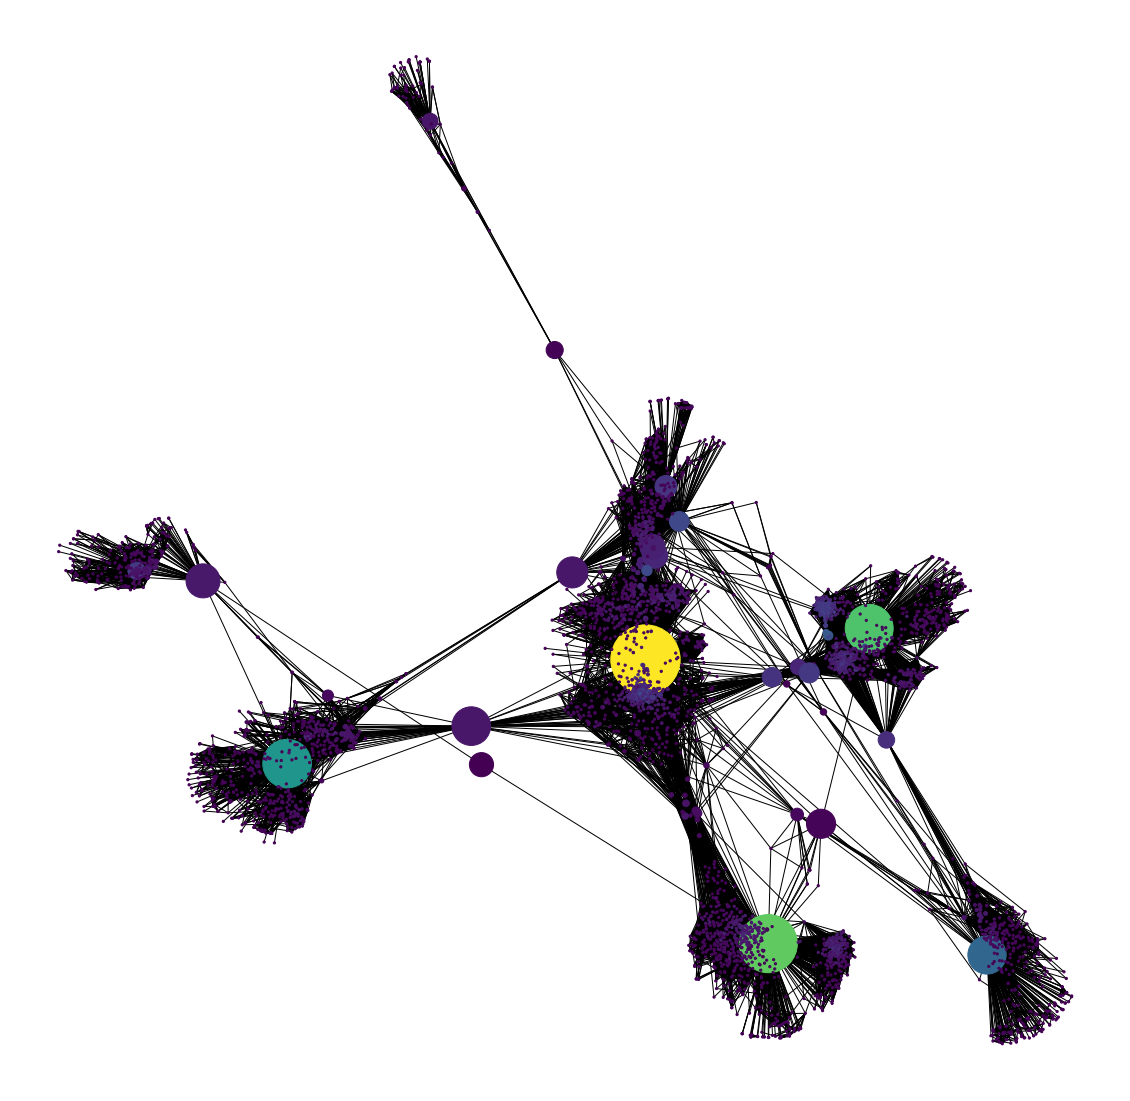

In [0]:
pos = nx.spring_layout(G1)
betCent = nx.betweenness_centrality(G1, normalized=True, endpoints=True)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in betCent.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(betCent, key=betCent.get, reverse=True)[:5]

# **Degree Centrality**

Merupakan jumlah koneksi yang dimiliki sebuah node. Degree centrality ditentukan dengan jumlah edges yang berhubungan dengan pada nodes (Alhajj dan
Rokne, 2014). Orang-orang yang paling populer atau lebih disukai biasanya adalah orang-orang yang memiliki lebih banyak teman. Derajat sentralitas adalah ukuran jumlah koneksi yang dimiliki simpul tertentu dalam jaringan. Hal ini didasarkan pada kenyataan bahwa node penting memiliki banyak koneksi. NetworkX memiliki fungsi degree_centrality () untuk menghitung derajat sentralitas dari semua node jaringan.

Semakin tinggi nilai degree centrality, maka dapat dikatakan bahwa akun tersebut
memiliki banyak hubungan sehingga dapat mempengaruhi akun lainnya. Dan semakin tinggi nilai betweenness maka menunjukkan bahwa akun tersebut berperan sebagai perantara antar aktor lainnya.


[107, 1684, 1912, 3437, 0]

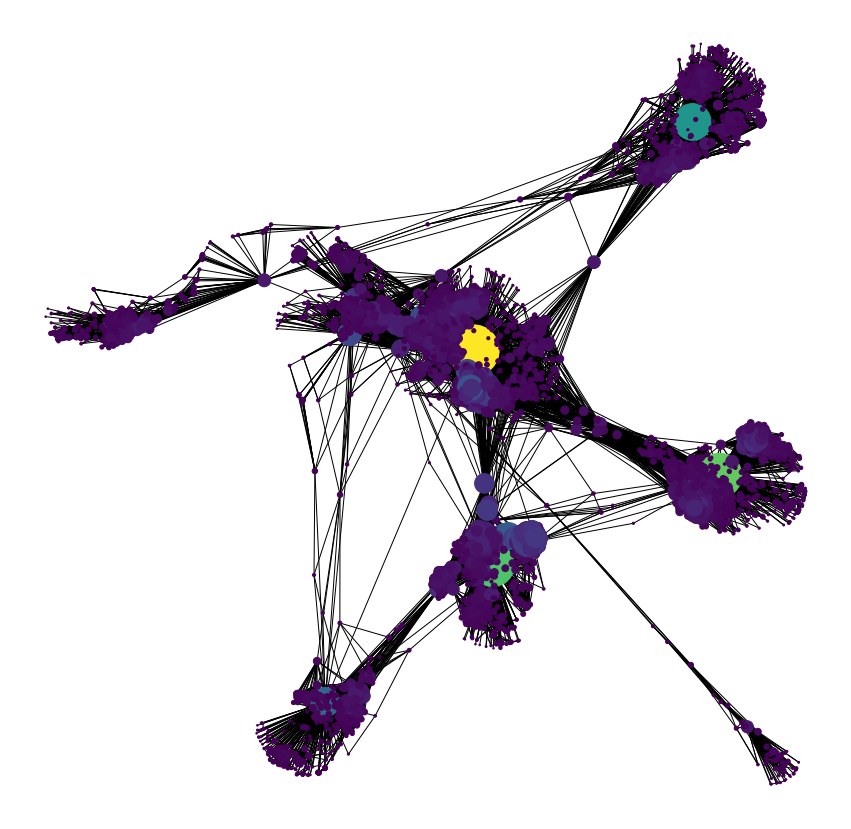

In [0]:
pos = nx.spring_layout(G1)
degCent = nx.degree_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

sorted(degCent, key=degCent.get, reverse=True)[:5]

In [0]:
sorted(degCent, key=degCent.get, reverse=True)[:5]

[107, 1684, 1912, 3437, 0]

# **Closeness Centrality**

Closeness centrality merupakan jarak rata-rata dari node yang diberikan ke semua simpul lain dalam jaringan sosial (Alhajj dan Rokne, 2014). Ukuran ini menggambarkan kedekatan node ini dengan node lain.  Semakin dekat, semakin terhubung orang tersebut dengan lainnya.   Analoginya adalah tipe orang “gaul” yang kenal dengan semua orang akan memiliki pengaruh yang lebih besar karena dapat menyebarkan informasi lebih cepat tanpa perlu perantara pihak ketiga.

Ide dasar closeness centrality adalah bahwa seorang aktif xi dikatakan sebagai
pusat jika aktor tersebut dapat berinteraksi dengan aktor
lain secara mudah.

*   yaitu, jarak dari aktor i ke aktor lain adalah terpendek.
*   Kita dapat menggunakan shortest distance untuk menghitung pengukuran ini. 

Dalam hal ini dapat disimpulkan bahwa,  User yang memiliki nilai closeness tertinggi menandakan user yang paling dekat dengan aktor lainnya. Sehingga jika akun tersebut menyebarkan informasi maka akan lebih cepat tersampaikan.

[107, 58, 428, 563, 1684]

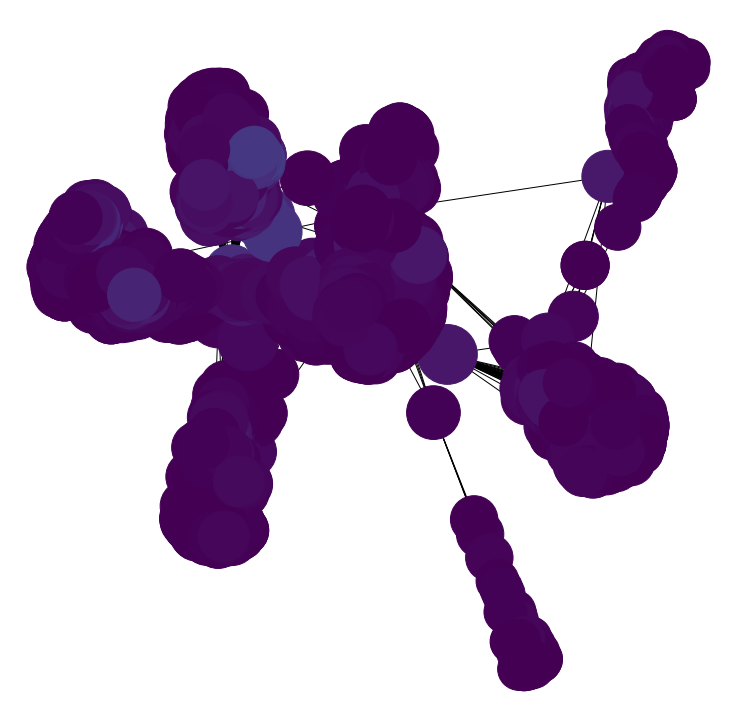

In [0]:
pos = nx.spring_layout(G1)
cloCent = nx.closeness_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in cloCent.values()]
plt.figure(figsize=(13,13))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')
sorted(cloCent, key=cloCent.get, reverse=True)[:5]

In [0]:
max(x for x,y in nx.degree(G1))

4038

In [0]:
sources = [20,40,65,75]
targets = [650,802,920,1010] 
for i in range(4):
    path = nx.shortest_path(G1,source=sources[i],target=targets[i])
    length = nx.shortest_path_length(G1,source=sources[i],target=targets[i],method='dijkstra')
    print("Shortest Path between Node ", str(sources[i])," ---> ", str(targets[i]), " is ",
          str(path), " ,Length = ", str(length))

Shortest Path between Node  20  --->  650  is  [20, 0, 34, 414, 650]  ,Length =  4
Shortest Path between Node  40  --->  802  is  [40, 0, 58, 1684, 860, 698, 686, 802]  ,Length =  7
Shortest Path between Node  65  --->  920  is  [65, 0, 107, 920]  ,Length =  3
Shortest Path between Node  75  --->  1010  is  [75, 0, 107, 1010]  ,Length =  3


In [0]:
neigh = [1,20,40,65,75,90,1000,]
for i in range(len(neigh)):
    all_neighbors = list(nx.classes.function.all_neighbors(G1,neigh[i]))
    print("All neighbors for Node ", str(neigh[i])," ---> ", str(all_neighbors))

All neighbors for Node  1  --->  [0, 48, 53, 54, 73, 88, 92, 119, 126, 133, 194, 236, 280, 299, 315, 322, 346]
All neighbors for Node  20  --->  [0, 2, 14, 41, 44, 111, 115, 149, 162, 214, 226, 312, 326, 333, 343]
All neighbors for Node  40  --->  [0, 21, 25, 26, 29, 56, 67, 72, 77, 113, 132, 133, 141, 142, 158, 169, 172, 199, 200, 203, 212, 213, 224, 231, 232, 239, 257, 258, 265, 271, 272, 274, 277, 280, 298, 304, 307, 315, 317, 322, 325, 329, 332, 334]
All neighbors for Node  65  --->  [0, 7, 13, 25, 82, 118, 203, 252, 261, 297, 314, 339]
All neighbors for Node  75  --->  [0, 9, 56, 67, 85, 170, 188, 200, 258, 272, 274, 304, 322, 323]
All neighbors for Node  90  --->  [0, 179]
All neighbors for Node  1000  --->  [107, 924, 974, 985, 1010, 1127, 1134, 1228, 1304, 1474, 1640, 1667, 1703, 1725, 1759, 1840]


In [0]:
list(nx.selfloop_edges(G1, keys=True, data=True))
#None []

[]

In [0]:
d = dict(G1.degree()).values()
from collections import Counter
Counter(d)

Counter({1: 75,
         2: 98,
         3: 93,
         4: 99,
         5: 93,
         6: 98,
         7: 98,
         8: 111,
         9: 100,
         10: 95,
         11: 81,
         12: 82,
         13: 79,
         14: 87,
         15: 106,
         16: 82,
         17: 76,
         18: 73,
         19: 72,
         20: 63,
         21: 52,
         22: 63,
         23: 53,
         24: 60,
         25: 55,
         26: 56,
         27: 49,
         28: 37,
         29: 38,
         30: 40,
         31: 38,
         32: 44,
         33: 35,
         34: 43,
         35: 36,
         36: 43,
         37: 43,
         38: 44,
         39: 29,
         40: 27,
         41: 29,
         42: 21,
         43: 29,
         44: 21,
         45: 19,
         46: 24,
         47: 24,
         48: 24,
         49: 33,
         50: 25,
         51: 20,
         52: 19,
         53: 15,
         54: 23,
         55: 23,
         56: 18,
         57: 23,
         58: 15,
         59: 11,
   

# **Eigenvector Centrality**

Eigenvector centrality menunjukkan node terpenting dalam jaringan berdasarkan koneksi yang dimiliki node dan node yang berhubungan dengan node tersebut (Alhajj dan Rokne, 2014).
Merupakan ukuran yang memberikan bobot yang lebih tinggi pada node yang terhubung dengan node yang juga memiliki keterhubungan tinggi. Dapat dikatakan versi rekursif dari degree centrality.

Dalam hal ini,  user yang memiliki nilai eigenvector tertinggi menandakan bahwa user tersebut memiliki hubungan dengan banyak aktor penting dalam jaringan sosial.

(-0.840780052888739,
 1.087656146365583,
 -1.0107198391403456,
 0.6481960244107059)

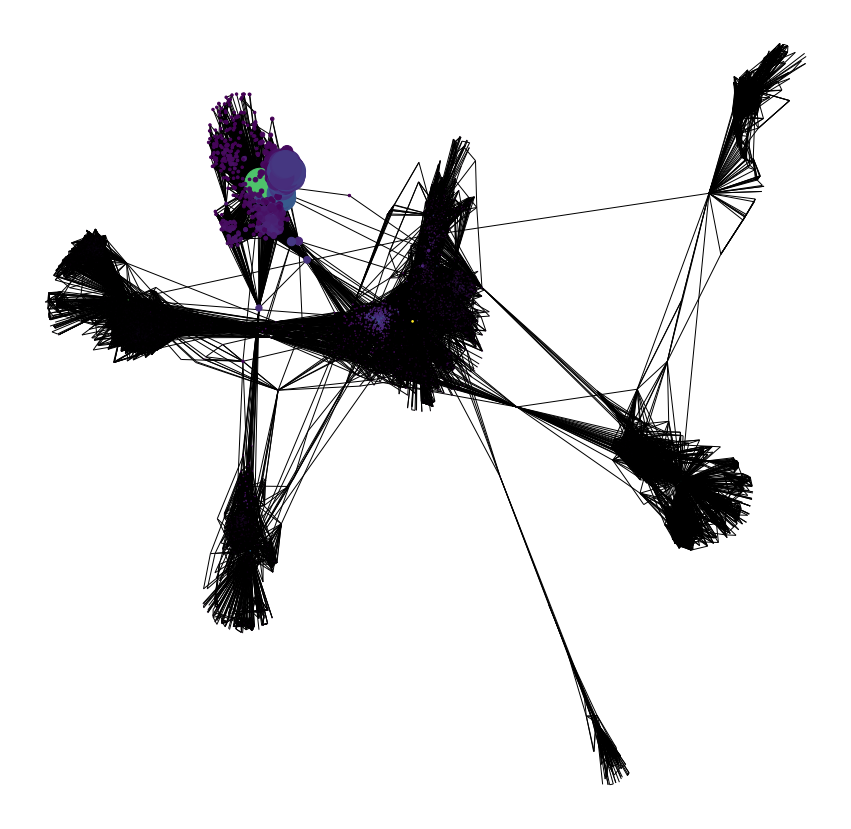

In [0]:
#pos = nx.spring_layout(G1)
eigCent = nx.eigenvector_centrality(G1)
node_color = [20000.0 * G1.degree(v) for v in G1]
node_size =  [v * 10000 for v in eigCent.values()]
plt.figure(figsize=(15,15))
nx.draw_networkx(G1, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')